<a href="https://colab.research.google.com/github/ChirudeepG/Clustering-assignment/blob/main/Gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset**

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

**Reading Dataset**

In [ ]:
dataset_path = '/content/Country-data.csv'

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
data = df.loc[:, ['country', 'child_mort']]
data.head(2)

,country,child_mort
0,Afghanistan,90.2
1,Albania,16.6


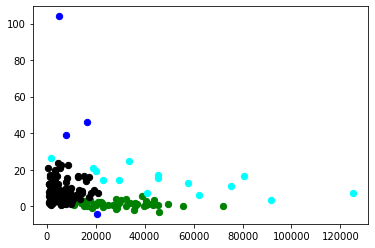

In [ ]:
import sklearn.mixture
from sklearn.mixture import GaussianMixture
data = df.loc[:, ['income', 'inflation']]
data.head(2)
X = data.values
gmm = GaussianMixture(n_components=4).fit(X)

#predictions from gmm
labels = gmm.predict(X)
frame = pd.DataFrame(X)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k],s=40,cmap='viridis')
plt.show()

GMM is a probabilistic model so it is possible to calculate the probability of the cluster assignment. In Scikit Learn we use the predict_proba method for this. It returns a matrix of size [n_samples, n_clusters] which measures the probability that any point belongs to the given cluster:

In [ ]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.    0.003 0.997]
 [0.001 0.153 0.001 0.846]
 [0.03  0.    0.108 0.863]
 [0.006 0.    0.235 0.759]
 [0.008 0.944 0.    0.047]]


Visualizing uncertainty: by making the size of each point proportional to the certainty of its prediction

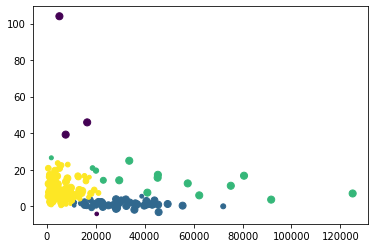

In [ ]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

Looking at the above figure, it's clear that it is precisely the points at the boundaries between clusters that reflect this uncertainty of cluster assignment.